#### Make the Other Charts: Silly's Ice Cream Shop Project

I Scream, You Scream, We All Scream for `matplotlib` Charts!

#### Setup

In [1]:
# import matplotlib, colormap, and pandas
from matplotlib import pyplot as plt
import pandas as pd

# load data
ic_data = pd.read_csv('icecream_data.csv')

In [2]:
# display graphs correctly
%matplotlib inline
#plt.rcParams['figure.figsize'] = (5, 3)
#plt.rcParams['figure.dpi'] = 75

In [3]:
ic_data.head()

,day,date,day_of_week,day_of_week_num,humidity_afternoon,max_temp,sales_error,sales_total,top_flavor
0,1,08-01,monday,0,61,86,4.37,619.89,coffee
1,2,08-02,tuesday,1,59,87,2.92,562.28,moosetracks
2,3,08-03,wednesday,2,52,81,4.28,604.46,coffee
3,4,08-04,thursday,3,54,88,4.32,667.19,coffee
4,5,08-05,friday,4,54,87,8.91,693.86,coffee


#### Bar Chart

1. First up, **make a bar chart** to examine sales numbers for each day of the month. **Add a horiztonal AB line** at $640, the owner's benchmark for a successful sales day. **Add error bars** using the `sales_error` column. 

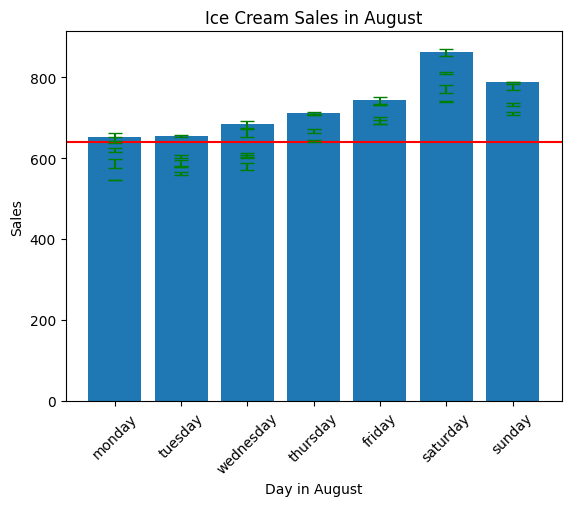

In [4]:
# make a bar chart


plt.bar(ic_data.day_of_week, ic_data.sales_total, width = 0.8 )
plt.title('Ice Cream Sales in August')
plt.axhline(y = 640, xmin = 0, xmax = 1, color = "red")
plt.errorbar(x=ic_data.day_of_week, y=ic_data.sales_total, yerr=ic_data.sales_error, color='green', fmt='none', capsize=5, label='Error Bars')
plt.xlabel('Day in August')
plt.xticks(rotation=45)
plt.ylabel('Sales')
plt.show()

2. There definitely appears to be some kind of pattern, so let's visualize this data by day of the week. **Run the cell below** to create a new `avg_by_day` dataframe. This script groups the sales data by day of the week and returns the average sales data for each day, so that we can make one averaged bar for each day. (If you want to learn how to do this on your own using `pandas`, check out our Data Science with Python content!)

In [5]:
# create our averaged bar graph data
avg_by_day = ic_data.groupby([ic_data['day_of_week_num'], ic_data['day_of_week']])['sales_total'].mean()
avg_by_day = avg_by_day.droplevel(0,'index').reset_index(name='sales_avg')
avg_by_day

,day_of_week,sales_avg
0,monday,609.6780
1,tuesday,597.8500
2,wednesday,627.3640
3,thursday,681.6525
4,friday,714.4100
5,saturday,795.4200
6,sunday,751.6550


3. Using our new `avg_by_day` dataframe, **make a bar chart by day of the week** to help the owner see which day has the best sales, and which the worst. Add the **horizontal AB line** at $640 again for reference. If the owner decides to close up shop one or two days of the week, which days make most sense? 

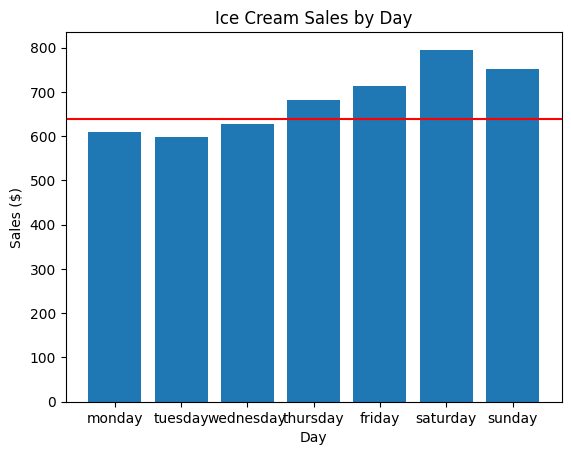

In [28]:
# make a bar chart by day of the week

plt.bar(avg_by_day.day_of_week, avg_by_day.sales_avg, width = 0.8)
plt.axhline(y = 640, xmin = 0, xmax = 1, color = "red")
plt.title('Ice Cream Sales by Day')
plt.xlabel('Day')
plt.ylabel('Sales ($)')
plt.show()

#### Pie Chart

4. Next, let's use a pie chart to visualize the top-selling flavors. Silly's serves 16 flavors of ice cream -- how many were the most popular flavor on at least one day in August? How do they compare to one another? **Run the cell below** to calculate the total count for each flavor that was listed as a top-seller in August. This code counts up the unique values in the `top_flavor` column of our original dataset and creates a new dataframe from them called `popular_flavors`. (Again, if you want to learn how to do this, check out our Data Science with Python course!)

In [29]:
# run this cell to create the data for our pie chart
# moosetracks is vanilla ice cream with mini peanut butter cups and fudge swirled in
popular_flavors = ic_data.top_flavor.value_counts().rename_axis('flavor').reset_index(name='count')
popular_flavors

,flavor,count
0,coffee,16
1,moosetracks,11
2,mint chip,4


5. **Create a pie chart** using the new `popular_flavors` dataframe. We recommend using `tan`, `saddlebrown`, and `lightgreen` for the three flavors.

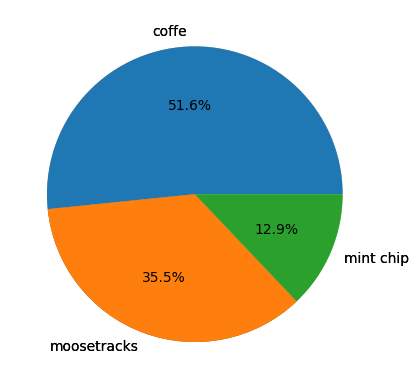

In [42]:
# pie chart

labels = "coffe", "moosetracks", "mint chip"
sizes = [16, 11, 4]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors = ['tan', 'saddlebrown', 'lightgreen'])
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()


#### Scatterplot

6. Now, the owner is curious about the impact of weather on sales. Using our original dataset again, **make two scatterplots in subplots** to compare the effect of temperature on ice cream sales, and the effect of humidity on ice cream sales. Should the owner consider adjusting the shop's opening hours or days based on weather predictions, or preparing for high volume days correlated with temperature or humidity?

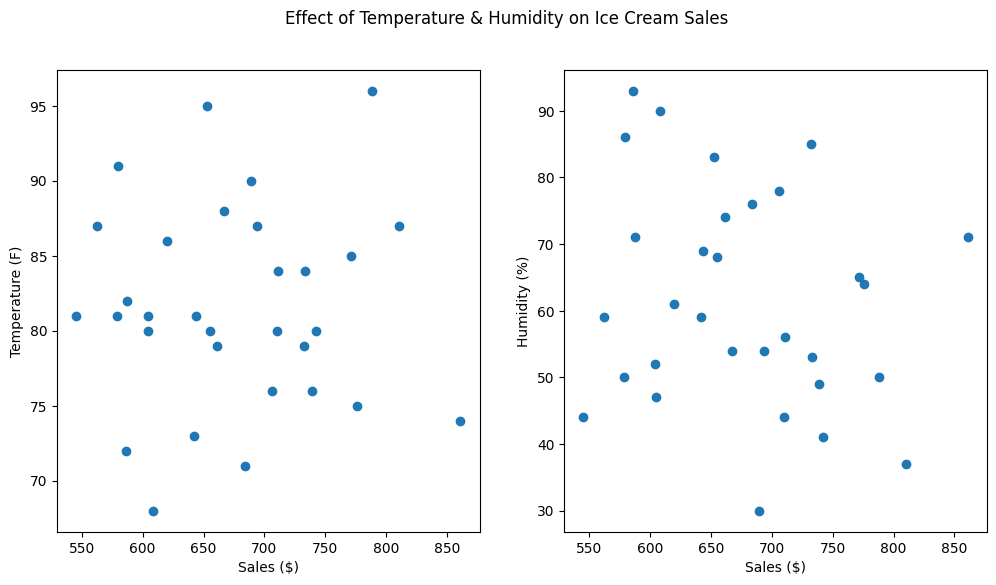

In [13]:
plt.rcParams['figure.figsize'] = (12, 6)
plt.scatter(ic_data.sales_total, ic_data.humidity_afternoon)
plt.suptitle('Effect of Temperature & Humidity on Ice Cream Sales')

plt.subplot(1,2,1)
plt.scatter(ic_data.sales_total, ic_data.max_temp)
plt.ylabel('Temperature (F)')
plt.xlabel('Sales ($)')

plt.subplot(1,2,2)
plt.scatter(ic_data.sales_total, ic_data.humidity_afternoon)
plt.ylabel('Humidity (%)')
plt.xlabel('Sales ($)')
plt.show()

#### Histogram

7. Finally, let's see how the sales data is distributed. **Make a 10-bin histogram** of the `sales_total` data.

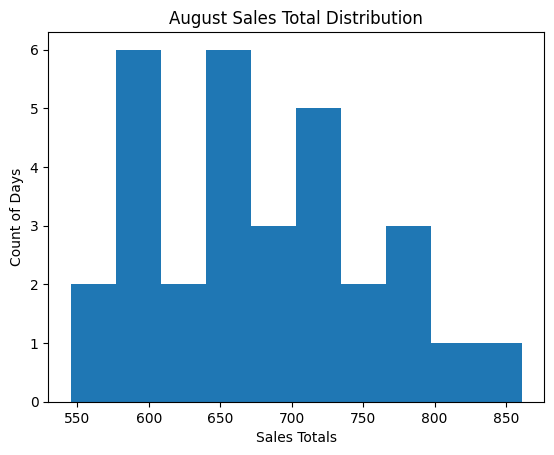

In [7]:
#histogram 
plt.hist(ic_data.sales_total, bins = 10)
plt.title('August Sales Total Distribution')
plt.xlabel('Sales Totals')
plt.ylabel('Count of Days')

plt.show()